In [2]:
import csv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pandas import Series
warnings.filterwarnings("ignore")

In [23]:
#显示所有列
pd.set_option('display.max_columns', None)
# #显示所有行
# pd.set_option('display.max_rows', None)
# #设置value的显示长度为100，默认为50
# pd.set_option('max_colwidth',100)

In [3]:
df= pd.read_csv("US_Accidents_Dec19.csv")

In [4]:
dataE = df[df.Timezone=='US/Eastern']

In [5]:
def severity(severity):
    if severity == 1 or severity == 2:
        return False
    else:
        return True
dataE['Severity'] = dataE['Severity'].apply(lambda x: severity(x))

In [6]:
dataE

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,True,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,False,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,False,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,True,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,False,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974012,A-2974036,Bing,NaN,False,2019-08-23 19:08:30,2019-08-23 19:38:27,33.803350,-84.249240,33.803530,-84.249600,0.024,Ramp to I-285 Northbound - Accident. Lane bloc...,NaN,E Ponce de Leon Ave,R,Clarkston,DeKalb,GA,30021,US,US/Eastern,KPDK,2019-08-23 18:53:00,85.0,85.0,63.0,28.92,10.0,NNW,5.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2974013,A-2974037,Bing,NaN,False,2019-08-23 20:29:30,2019-08-23 20:58:22,33.895722,-84.252706,33.899059,-84.247252,0.389,Between I-285/Exit 95 and Pleasantdale Rd/Exit...,NaN,GA-403 N,R,Atlanta,DeKalb,GA,30340,US,US/Eastern,KPDK,2019-08-23 20:53:00,80.0,80.0,74.0,28.94,10.0,N,5.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2974014,A-2974038,Bing,NaN,True,2019-08-23 19:51:27,2019-08-23 20:20:42,28.547080,-81.270170,28.547320,-81.253490,1.013,Closed at SR-417-TOLL/Exit 18 - Road closed du...,NaN,E West Expy E,R,Orlando,Orange,FL,32825,US,US/Eastern,KORL,2019-08-23 19:53:00,83.0,83.0,74.0,29.85,10.0,ENE,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2974015,A-2974039,Bing,NaN,True,2019-08-23 19:14:05,2019-08-23 19:43:39,25.935950,-80.199180,25.932061,-80.203819,0.394,Closed at US-441/Florida's Tpke/

In [7]:
st = pd.to_datetime(dataE.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(dataE.End_Time, format='%Y-%m-%d %H:%M:%S')
diff = (end-st)
diff = diff.astype('timedelta64[m]')
dataE.insert(6, "Duration", diff)

In [8]:
def datetoseason(date):
    month = pd.Timestamp(date).month
    if month == 3 or month == 4 or month == 5:
        return 'Spring'
    elif month == 6 or month == 7 or month == 8:
        return 'Summer'
    elif month == 9 or month == 10 or month == 11:
        return 'Fall'
    else:
        return 'Winter'
dataE['Start_Time'] = dataE['Start_Time'].apply(lambda x: datetoseason(x))
dataE = dataE.rename(columns={'Start_Time': 'Season'})

In [9]:
dataE.isnull().sum()

ID                             0
Source                         0
TMC                       251978
Severity                       0
Season                         0
End_Time                       0
Duration                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1025209
End_Lng                  1025209
Distance(mi)                   0
Description                    0
Number                    774160
Street                         0
Side                           0
City                          73
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                2416
Weather_Timestamp          12436
Temperature(F)             19318
Wind_Chill(F)             783487
Humidity(%)                20447
Pressure(in)               17056
Visibility(mi)             30069
Wind_Direction             15881
Wind_Speed

In [26]:
dataE

,Severity,Duration,Distance(mi),Side,Visibility(mi),Amenity,Crossing,Junction,Station,Traffic_Signal,Twilight
0,True,314.0,0.010,R,10.0,False,False,False,False,False,False
1,False,30.0,0.010,L,10.0,False,False,False,False,False,False
2,False,30.0,0.010,R,10.0,False,False,False,False,True,False
3,True,30.0,0.010,R,9.0,False,False,False,False,False,True
4,False,30.0,0.010,R,6.0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2974012,False,29.0,0.024,R,10.0,False,False,False,False,True,True
2974013,False,28.0,0.389,R,10.0,False,False,False,False,False,True
2974014,True,29.0,1.013,R,10.0,False,False,False,False,False,True
2974015,True,29.0,0.394,R,10.0,False,False,False,False,False,True


In [25]:
dropList=['TMC', 'Season',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
        'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Bump',  'Give_Way',
        'No_Exit', 'Railway', 'Roundabout',  'Stop',
       'Traffic_Calming', 'Turning_Loop']
dataE.drop(dropList, axis = 1, inplace = True) 

In [11]:
def Twilight(index):
    if index == 'Night':
        return False
    else:
        return True
dataE['Civil_Twilight'] = dataE['Civil_Twilight'].apply(lambda x: Twilight(x))
dataE = dataE.rename(columns={'Civil_Twilight': 'Twilight'})

In [12]:
dropList=['ID', 'Source', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)']
dataE.drop(dropList, axis = 1, inplace = True) 

In [27]:
dataE.dropna(axis=0,how='any',inplace=True)

In [28]:
dataE

,Severity,Duration,Distance(mi),Side,Visibility(mi),Amenity,Crossing,Junction,Station,Traffic_Signal,Twilight
0,True,314.0,0.010,R,10.0,False,False,False,False,False,False
1,False,30.0,0.010,L,10.0,False,False,False,False,False,False
2,False,30.0,0.010,R,10.0,False,False,False,False,True,False
3,True,30.0,0.010,R,9.0,False,False,False,False,False,True
4,False,30.0,0.010,R,6.0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2974012,False,29.0,0.024,R,10.0,False,False,False,False,True,True
2974013,False,28.0,0.389,R,10.0,False,False,False,False,False,True
2974014,True,29.0,1.013,R,10.0,False,False,False,False,False,True
2974015,True,29.0,0.394,R,10.0,False,False,False,False,False,True


In [32]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
dataE['Side'] = le.fit_transform(dataE['Side'])

#display the initial records

In [58]:
dataE

,Severity,Duration,Distance(mi),Side,Visibility(mi),Amenity,Crossing,Junction,Station,Traffic_Signal,Twilight
0,True,314.0,0.010,1,10.0,False,False,False,False,False,False
1,False,30.0,0.010,0,10.0,False,False,False,False,False,False
2,False,30.0,0.010,1,10.0,False,False,False,False,True,False
3,True,30.0,0.010,1,9.0,False,False,False,False,False,True
4,False,30.0,0.010,1,6.0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2974012,False,29.0,0.024,1,10.0,False,False,False,False,True,True
2974013,False,28.0,0.389,1,10.0,False,False,False,False,False,True
2974014,True,29.0,1.013,1,10.0,False,False,False,False,False,True
2974015,True,29.0,0.394,1,10.0,False,False,False,False,False,True


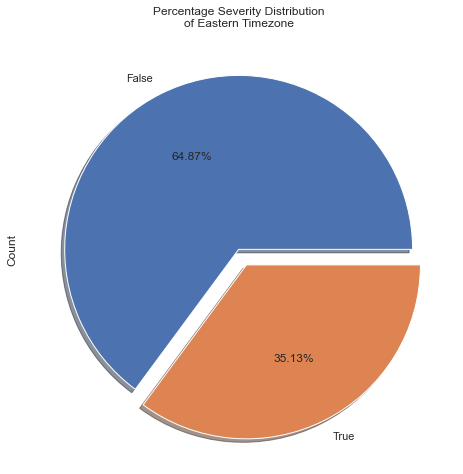

In [36]:
plt.figure(figsize=(18,8))
dataE['Severity'].value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%',shadow=True)
plt.title('Percentage Severity Distribution\nof Eastern Timezone')
plt.ylabel('Count')
plt.show()

In [51]:
dataE = pd.read_csv("11col.csv")
dataE.drop('Unnamed: 0', axis=1, inplace=True)

In [52]:
dataE

,Severity,Duration,Distance(mi),Side,Visibility(mi),Amenity,Crossing,Junction,Station,Traffic_Signal,Twilight
0,True,314.0,0.010,1,10.0,False,False,False,False,False,False
1,False,30.0,0.010,0,10.0,False,False,False,False,False,False
2,False,30.0,0.010,1,10.0,False,False,False,False,True,False
3,True,30.0,0.010,1,9.0,False,False,False,False,False,True
4,False,30.0,0.010,1,6.0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1247113,False,29.0,0.024,1,10.0,False,False,False,False,True,True
1247114,False,28.0,0.389,1,10.0,False,False,False,False,False,True
1247115,True,29.0,1.013,1,10.0,False,False,False,False,False,True
1247116,True,29.0,0.394,1,10.0,False,False,False,False,False,True


Class False: 809064
Class True: 438054
Proportion: 1.85 : 1


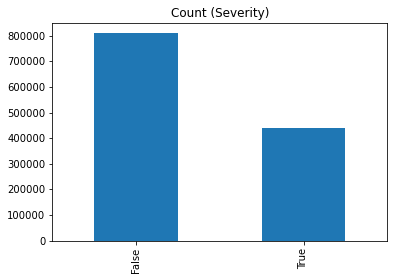

In [53]:
Severity_count = dataE.Severity.value_counts()
print('Class False:', Severity_count[0])
print('Class True:', Severity_count[1])
print('Proportion:', round(Severity_count[0] / Severity_count[1], 2), ': 1')

Severity_count.plot(kind='bar', title='Count (Severity)')

In [54]:
count_class_False, count_class_True = dataE.Severity.value_counts()

# Divide by class

df_class_False = dataE[dataE['Severity'] == False]
df_class_True = dataE[dataE['Severity'] == True]

Random under-sampling:
True     438054
False    438054
Name: Severity, dtype: int64


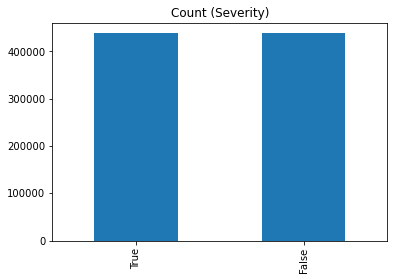

In [55]:
df_class_False_under = df_class_False.sample(count_class_True
                                             , random_state = 10)
dataE = pd.concat([df_class_False_under, df_class_True], axis=0)

print('Random under-sampling:')
print(dataE.Severity.value_counts())

dataE.Severity.value_counts().plot(kind='bar', title='Count (Severity)');

In [9]:
dataE

,Severity,Duration,Distance(mi),Side,Visibility(mi),Amenity,Crossing,Junction,Station,Traffic_Signal,Twilight
587312,False,59.0,0.000,1,5.0,False,False,False,False,True,True
725886,False,44.0,0.000,0,10.0,False,True,False,False,True,False
1028396,False,360.0,1.179,1,10.0,False,False,False,False,False,True
350190,False,179.0,0.000,1,10.0,False,False,False,False,False,True
538082,False,44.0,0.000,1,3.0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1247106,True,28.0,0.470,1,2.0,False,False,False,False,False,True
1247107,True,28.0,9.036,1,10.0,False,False,False,False,False,True
1247115,True,29.0,1.013,1,10.0,False,False,False,False,False,True
1247116,True,29.0,0.394,1,10.0,False,False,False,False,False,True


In [10]:
dataE.sort_index()

,Severity,Duration,Distance(mi),Side,Visibility(mi),Amenity,Crossing,Junction,Station,Traffic_Signal,Twilight
0,True,314.0,0.010,1,10.0,False,False,False,False,False,False
1,False,30.0,0.010,0,10.0,False,False,False,False,False,False
2,False,30.0,0.010,1,10.0,False,False,False,False,True,False
3,True,30.0,0.010,1,9.0,False,False,False,False,False,True
5,True,30.0,0.010,1,7.0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1247113,False,29.0,0.024,1,10.0,False,False,False,False,True,True
1247114,False,28.0,0.389,1,10.0,False,False,False,False,False,True
1247115,True,29.0,1.013,1,10.0,False,False,False,False,False,True
1247116,True,29.0,0.394,1,10.0,False,False,False,False,False,True


In [56]:
from sklearn import preprocessing
# Now let’s Split Data (most of data for training 70-80 Percent)
#import the necessary module
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
dataE = preprocessing.scale(dataE)

In [58]:
X = [dataE[row][1:] for row in range(len(dataE))]
y = [dataE[row][0] for row in range(len(dataE))]

In [14]:
from sklearn.linear_model import LinearRegression


linear=[]
for time in range(5):

    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    
    reg = LinearRegression().fit(data_train, target_train)
    
    linear.append(round(reg.score(data_test, target_test), 3))

In [39]:
test = pd.read_csv("11col.csv")
test.drop('Unnamed: 0', axis=1, inplace=True)


test = preprocessing.scale(test)
X = [test[row][1:] for row in range(len(test))]
y = [test[row][0] for row in range(len(test))]

data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.005)


In [48]:
from sklearn.metrics import accuracy_score
predict=[]
for each in data_test:
    if reg.predict([each]) >= 0:
        predict.append(-0.7358213529055618)
    else:
        predict.append(1.3590255244038074)
    target_test = [int(each) for each in target_test]
    predict = [int(each) for each in predict]
print(round(accuracy_score(target_test, predict, normalize = True), 2))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [13]:
linear

[0.162, 0.163, 0.16, 0.161, 0.161]

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn=[]
# for k in range(3, 15, 2): #range(3, 6, 2)
#     tmpknn=[]
#     for time in range(5):#    for time in :#
#         # Now let’s Split Data (most of data for training 70-80 Percent)
#         #split data set into train and test sets
#         data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

#         neigh = KNeighborsClassifier(n_neighbors=k)
#         neigh.fit(data_train, target_train)
        
#         tmpknn.append(neigh.score(data_test, target_test, sample_weight=None))

#     knn.append(tmpknn)

In [27]:
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
per

[0.595, 0.582, 0.621, 0.525, 0.621]

In [45]:
from sklearn.metrics import accuracy_score
predict=[]
for each in data_test:
    predict.append(clf.predict([each]))
    target_test = [tran(each) for each in target_test]
    predict = [int(each) for each in predict]
print(round(accuracy_score(target_test, predict, normalize = True), 2))

trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
tran

trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
tran

trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
tran

trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
tran

trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
trans Error
tran

TypeError: float() argument must be a string or a number, not 'NoneType'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

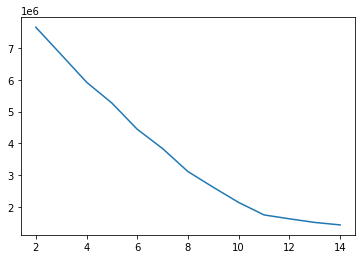

In [20]:
from sklearn.cluster import KMeans
loss=[]
for k in range(2, 15):
    #Kmeans=================================================================
    kmeans = KMeans(n_clusters=k)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    loss.append([k, kmeans.inertia_])
plt.plot([each[0] for each in loss], [each[1] for each in loss])

In [104]:
size = 10

In [121]:
from minisom import MiniSom
som = MiniSom(size, size, 10, sigma=0.3, learning_rate=0.3)
som.random_weights_init(X)
som.train_random(X, 20000)


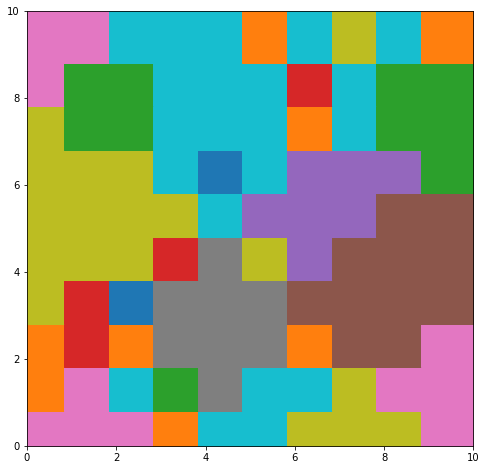

In [122]:
W = som.get_weights()
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
features=[]
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        features.append(np.argmax(W[i, j , :]))
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=60)



plt.xlim([0, size])
plt.ylim([0, size])
plt.show()

In [123]:
len(set(features))

10

In [60]:
from sklearn.cluster import KMeans
#Kmeans=================================================================
kmeans = KMeans(n_clusters=11)
# Fitting the input data
kmeans = kmeans.fit(X)

In [61]:
zero=[]
one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]
ten=[]

label = kmeans.predict(X)

for index, prediction in enumerate(label):
    if prediction == 0:
        zero.append([y[index]] + X[index].tolist())
    elif prediction == 1:
        one.append([y[index]] + X[index].tolist())
    elif prediction == 2:
        two.append([y[index]] + X[index].tolist())
    elif prediction == 3:
        three.append([y[index]] + X[index].tolist())
    elif prediction == 4:
        four.append([y[index]] + X[index].tolist())
    elif prediction == 5:
        five.append([y[index]] + X[index].tolist())
    elif prediction == 6:
        six.append([y[index]] + X[index].tolist())
    elif prediction == 7:
        seven.append([y[index]] + X[index].tolist())
    elif prediction == 8:
        eight.append([y[index]] + X[index].tolist())
    elif prediction == 9:
        nine.append([y[index]] + X[index].tolist())
    elif prediction == 10:
        ten.append([y[index]] + X[index].tolist())

In [62]:
print(len(zero))
print(len(one))
print(len(two))
print(len(three))
print(len(four))
print(len(five))
print(len(six))
print(len(seven))
print(len(eight))
print(len(nine))
print(len(ten))

378600
7399
66766
44677
11496
26
93620
80249
7052
85190
101033


In [67]:
import pandas as pd

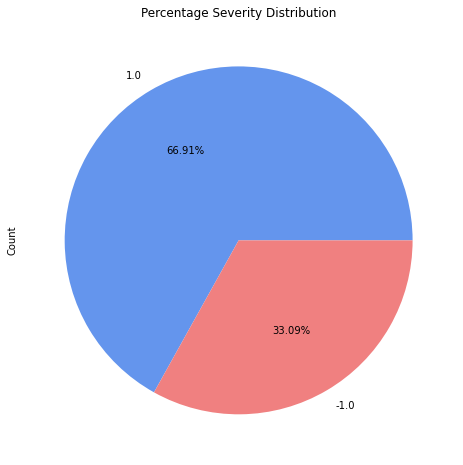

In [86]:
plt.figure(figsize=(18,8))
pd.Series([each[0] for each in ten]).value_counts().plot.pie(autopct='%.2f%%', colors =['cornflowerblue', 'lightcoral'])
plt.title('Percentage Severity Distribution')
plt.ylabel('Count')
plt.show()

In [58]:
print(len(zero))
print(len(one))
print(len(two))
print(len(three))
print(len(four))
print(len(five))
print(len(six))
print(len(seven))
print(len(eight))
print(len(nine))
print(len(ten))

44676
378562
101017
93619
11496
66765
80245
26
85190
7113
7399


In [106]:
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [145]:
def getcorL(cors):
    for index, each in enumerate(cors):
        getcor(each)

def getcor(cors):
    cors.remove(max(cors))
    cors.remove(min(cors))
    print(str(round(np.mean(cors) * 100,2))+'%')

In [119]:
print(type(per))

<class 'list'>


In [122]:
type(per) == type([])

True

In [146]:
X = [zero[row][1:] for row in range(len(zero))]
y = [zero[row][0] for row in range(len(zero))]

per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 26, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

85.73%


86.57%
87.27%
87.3%
87.47%
87.43%
87.47%
87.4%
87.57%
87.53%
87.5%
87.47%
87.6%


In [158]:
X = [one[row][1:] for row in range(len(one))]
y = [one[row][0] for row in range(len(one))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 9, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

46.6%


58.2%
56.63%
60.77%


In [152]:
knn

[]

In [149]:
X = [two[row][1:] for row in range(len(two))]
y = [two[row][0] for row in range(len(two))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 12, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

62.97%


60.27%
58.3%
63.4%
64.47%
62.8%


In [153]:
X = [three[row][1:] for row in range(len(three))]
y = [three[row][0] for row in range(len(three))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 10, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

84.07%


87.07%
87.97%
88.17%
88.2%


In [150]:
X = [four[row][1:] for row in range(len(four))]
y = [four[row][0] for row in range(len(four))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 10, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

87.53%


86.8%
88.37%
88.17%
88.6%
88.0%


In [154]:
X = [five[row][1:] for row in range(len(five))]
y = [five[row][0] for row in range(len(five))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 10, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

53.6%


65.6%
67.03%
68.1%
68.63%


In [155]:
X = [six[row][1:] for row in range(len(six))]
y = [six[row][0] for row in range(len(six))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 10, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

55.47%


61.53%
63.3%
64.83%
64.7%


In [102]:
X = [seven[row][1:] for row in range(len(seven))]
y = [seven[row][0] for row in range(len(seven))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(7):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
per

ValueError: The number of classes has to be greater than one; got 1 class

In [156]:
X = [eight[row][1:] for row in range(len(eight))]
y = [eight[row][0] for row in range(len(eight))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(5):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 10, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(5):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

79.53%


81.37%
80.03%
82.27%
82.43%


In [141]:
X = [nine[row][1:] for row in range(len(nine))]
y = [nine[row][0] for row in range(len(nine))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(7):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 26, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(7):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

89.97%


88.47%
90.03%
90.27%
90.5%
90.03%
90.3%
90.13%
90.23%
90.77%
90.2%
90.4%
90.3%


In [140]:
X = [ten[row][1:] for row in range(len(ten))]
y = [ten[row][0] for row in range(len(ten))]
from sklearn.linear_model import Perceptron
per=[]

for time in range(7):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
    clf = Perceptron().fit(data_train, target_train)
    per.append(round(clf.score(data_test, target_test, sample_weight=None), 3))
    
getcor(per)
print('\n')
from sklearn.neighbors import KNeighborsClassifier

knn=[]
for k in range(3, 26, 2): #range(3, 6, 2)
    tmpknn=[]
    for time in range(7):#    for time in :#
        # Now let’s Split Data (most of data for training 70-80 Percent)
        #split data set into train and test sets
        data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train, target_train)
        
        tmpknn.append(round(neigh.score(data_test, target_test, sample_weight=None), 3))

    knn.append(tmpknn)

getcorL(knn)

84.07%


85.73%
86.37%
86.17%
86.73%
86.47%
86.57%
86.2%
86.0%
85.27%
85.33%
86.07%
85.57%


In [178]:
X = [zero[row][1:] for row in range(len(zero))]
y = [zero[row][0] for row in range(len(zero))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh0 = KNeighborsClassifier(n_neighbors=5)
neigh0.fit(data_train, target_train)

print(round(neigh0.score(data_test, target_test, sample_weight=None), 3))

0.87


In [187]:
X = [one[row][1:] for row in range(len(one))]
y = [one[row][0] for row in range(len(one))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh1 = KNeighborsClassifier(n_neighbors=7)
neigh1.fit(data_train, target_train)

print(round(neigh1.score(data_test, target_test, sample_weight=None), 3))

0.611


In [179]:
X = [two[row][1:] for row in range(len(two))]
y = [two[row][0] for row in range(len(two))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh2 = KNeighborsClassifier(n_neighbors=9)
neigh2.fit(data_train, target_train)

print(round(neigh2.score(data_test, target_test, sample_weight=None), 3))

0.638


In [180]:
X = [three[row][1:] for row in range(len(three))]
y = [three[row][0] for row in range(len(three))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh3 = KNeighborsClassifier(n_neighbors=7)
neigh3.fit(data_train, target_train)

print(round(neigh3.score(data_test, target_test, sample_weight=None), 3))

0.881


In [181]:
X = [four[row][1:] for row in range(len(four))]
y = [four[row][0] for row in range(len(four))]

from sklearn.linear_model import Perceptron
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)
clf4 = Perceptron().fit(data_train, target_train)
print(round(clf4.score(data_test, target_test, sample_weight=None), 3))

0.876


In [182]:
X = [five[row][1:] for row in range(len(five))]
y = [five[row][0] for row in range(len(five))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh5 = KNeighborsClassifier(n_neighbors=9)
neigh5.fit(data_train, target_train)

print(round(neigh5.score(data_test, target_test, sample_weight=None), 3))

0.685


In [183]:
X = [six[row][1:] for row in range(len(six))]
y = [six[row][0] for row in range(len(six))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh6 = KNeighborsClassifier(n_neighbors=7)
neigh6.fit(data_train, target_train)

print(round(neigh6.score(data_test, target_test, sample_weight=None), 3))

0.655


In [ ]:
# X = [se[row][1:] for row in range(len(ten))]
# y = [ten[row][0] for row in range(len(ten))]

# from sklearn.neighbors import KNeighborsClassifier
# data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

# neigh = KNeighborsClassifier(n_neighbors=k)
# neigh.fit(data_train, target_train)

# print(round(neigh.score(data_test, target_test, sample_weight=None), 3))

In [188]:
X = [eight[row][1:] for row in range(len(eight))]
y = [eight[row][0] for row in range(len(eight))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh8 = KNeighborsClassifier(n_neighbors=9)
neigh8.fit(data_train, target_train)

print(round(neigh8.score(data_test, target_test, sample_weight=None), 3))

0.82


In [189]:
X = [nine[row][1:] for row in range(len(nine))]
y = [nine[row][0] for row in range(len(nine))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh9 = KNeighborsClassifier(n_neighbors=19)
neigh9.fit(data_train, target_train)

print(round(neigh9.score(data_test, target_test, sample_weight=None), 3))

0.905


In [186]:
X = [ten[row][1:] for row in range(len(ten))]
y = [ten[row][0] for row in range(len(ten))]

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.30)

neigh10 = KNeighborsClassifier(n_neighbors=9)
neigh10.fit(data_train, target_train)

print(round(neigh10.score(data_test, target_test, sample_weight=None), 3))

0.863


In [15]:
test = pd.read_csv("11col.csv")
test.drop('Unnamed: 0', axis=1, inplace=True)


test = preprocessing.scale(test)
X = [test[row][1:] for row in range(len(test))]
y = [test[row][0] for row in range(len(test))]

data_train, data_test, target_train, target_test = train_test_split(X, y, test_size = 0.2)


In [262]:
combine(data_test, target_test)

[-1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -

0.63

In [257]:
def combine(data_test, target_test):
    from sklearn.metrics import accuracy_score
    predict=[]
    kmeanslabels = kmeans.predict(data_test)
    for index, label in enumerate(kmeanslabels):
        if label==0:
            predict.append(neigh0.predict([data_test[index]]))
        elif label==1:
            predict.append(neigh1.predict([data_test[index]]))
        elif label==2:
            predict.append(neigh2.predict([data_test[index]]))
        elif label==3:
            predict.append(neigh3.predict([data_test[index]]))
        elif label==4:
            predict.append(clf4.predict([data_test[index]]))
        elif label==5:
            predict.append(neigh5.predict([data_test[index]]))
        elif label==6:
            predict.append(neigh6.predict([data_test[index]]))
        elif label==7:
            predict.append(-1)
        elif label==8:
            predict.append(neigh8.predict([data_test[index]]))
        elif label==9:
            predict.append(neigh9.predict([data_test[index]]))
        elif label==10:
            predict.append(neigh10.predict([data_test[index]]))
        else:
            print('Kmeans Error')
    target_test = [tran(each) for each in target_test]
    predict = [int(each) for each in predict]
    print(predict)
    print(len(predict))
    print(len(target_test))
    return round(accuracy_score(target_test, predict, normalize = True), 2)

In [44]:
def tran(predict):
    if round(float(predict), 2)==round(-0.7358213529055618, 2):
        return -1
    elif round(float(predict), 2)==round(1.3590255244038074, 2):
        return 1
    else:
        print('trans Error')
        

NameError: name 'one' is not defined